In [13]:
from transformers import T5ForConditionalGeneration, T5Tokenizer
import torch
from datasets import load_dataset
import pandas as pd
import numpy as np
from src.tfr_decoding.finepref_sample import sample # new sampling method
from src.utils.samp_utils import inpsampall, dset_randsamp   
from src.tfr_decoding.shp_modeling import T5BinaryClassifier
from prefix_sampling import PrefixSampler, test_baseline, test_pfsample, test_finesample, test_apsample, test_enhancedsample
import matplotlib.pyplot as plt

In [62]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
# first load relevant models
device = 'cuda:0' # if you have a GPU
pfmod_path = "./lightning_logs/bestmodel/checkpoints/epoch=2-step=23950.ckpt"

# get generation model
tokenizer = T5Tokenizer.from_pretrained("google/flan-t5-xxl")

qpref = T5BinaryClassifier.load_from_checkpoint(pfmod_path)
model = T5ForConditionalGeneration.from_pretrained("google/flan-t5-xxl", device_map="auto")#.to(device)
#model.sample = sample.__get__(model)
model.tokenizer = tokenizer
model.tok = tokenizer
pfname = 'stanfordnlp/SteamSHP-flan-t5-large'
max_len = 512
learning_rate = 3e-5
preftok = T5Tokenizer.from_pretrained(pfname)

model.qualitypref = qpref
#model.stdpref = T5BinaryClassifier.load_from_checkpoint("./lightning_logs/version_11/checkpoints/epoch=3-step=3359.ckpt")
# set up relevant mdoels
model.downmetric = T5ForConditionalGeneration.from_pretrained('stanfordnlp/SteamSHP-flan-t5-xl').to(device)
model.downtok = T5Tokenizer.from_pretrained('stanfordnlp/SteamSHP-flan-t5-xl')
model.eval()

In [4]:
# load up our dataset
elidf = pd.read_json("output/elidataset.jsonl", orient="records", lines="true")
# start from 15000 for latest exploration
elidf = elidf.drop_duplicates(subset="history").iloc[15000:15100]

pfsampler = PrefixSampler(model)
inplist = list(elidf['history'])

In [ ]:
with torch.no_grad():
    finesample_df = test_finesample(inplist, pfsampler, 9, 3, 6, 5)
    finesample_df.to_json("output/hparam_explore/fsamp.jsonl", orient="records", lines=True)

In [ ]:
with torch.no_grad():
    finesample_df = test_apsample(inplist[:10], pfsampler, 0.85, 3, 1, 3)


In [ ]:
with torch.no_grad():
    finesample_df = test_pfsample(inplist[:10], pfsampler, 0.85, 3, 1, 3)

In [ ]:
ind = 1
with torch.no_grad():
    finesample_df = test_enhancedsample(inplist[ind:ind+1], pfsampler, 18, [7, 20], 3, 3, None)

In [69]:
a = [1, 2]
a[:-3]

[]

In [11]:
resold = pd.read_json("output/hparam_explore2/enhsamp7_20.jsonl", orient='records', lines=True)

In [37]:
from statistics import median, mean

In [20]:
median(resold['scos'])

0.84764552115

In [26]:
def count_tokens(text):
    return len(tokenizer(text).input_ids)

resold['extra_toks'] = resold['budgets'] - resold['outs'].apply(count_tokens)

(array([155.,  65.,  53.,  38.,  17.,  23.,  13.,  11.,  14.,  11.]),
 array([ -1. ,   9.8,  20.6,  31.4,  42.2,  53. ,  63.8,  74.6,  85.4,
         96.2, 107. ]),
 <BarContainer object of 10 artists>)

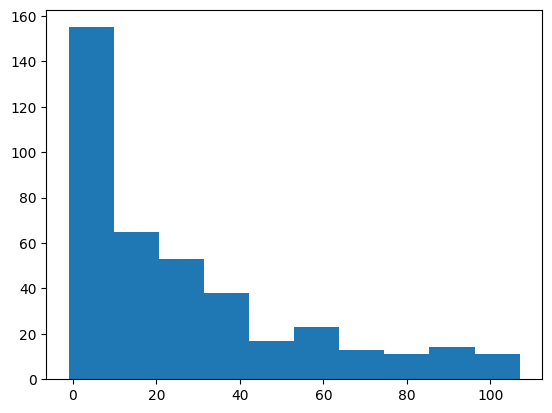

In [75]:
plt.hist(resold[resold.extra_toks<108].extra_toks)

In [53]:
len(resold[resold.extra_toks<108].scos)

400

In [51]:
mean(resold.extra_toks)

56.7

In [43]:
list(resold.extra_toks)

[39,
 0,
 36,
 13,
 97,
 108,
 123,
 109,
 24,
 0,
 0,
 129,
 108,
 24,
 13,
 0,
 108,
 108,
 108,
 150,
 108,
 36,
 0,
 18,
 108,
 108,
 108,
 30,
 36,
 108,
 51,
 82,
 49,
 108,
 108,
 0,
 108,
 6,
 150,
 120,
 3,
 108,
 45,
 30,
 108,
 42,
 54,
 48,
 108,
 108,
 12,
 138,
 156,
 0,
 38,
 0,
 6,
 108,
 0,
 67,
 26,
 0,
 122,
 108,
 36,
 108,
 108,
 108,
 0,
 49,
 25,
 26,
 18,
 0,
 0,
 0,
 25,
 6,
 108,
 0,
 118,
 108,
 6,
 3,
 108,
 150,
 13,
 0,
 13,
 108,
 0,
 6,
 0,
 59,
 0,
 24,
 54,
 0,
 37,
 24,
 12,
 12,
 6,
 108,
 143,
 6,
 0,
 108,
 108,
 107,
 42,
 36,
 66,
 108,
 108,
 101,
 0,
 108,
 13,
 108,
 0,
 0,
 112,
 108,
 48,
 30,
 0,
 108,
 54,
 12,
 42,
 12,
 108,
 0,
 107,
 62,
 96,
 0,
 150,
 0,
 0,
 25,
 108,
 90,
 108,
 0,
 0,
 0,
 12,
 24,
 12,
 73,
 5,
 17,
 150,
 120,
 108,
 108,
 6,
 13,
 18,
 108,
 0,
 34,
 13,
 108,
 0,
 48,
 147,
 24,
 13,
 6,
 19,
 108,
 30,
 12,
 42,
 109,
 7,
 150,
 36,
 108,
 30,
 66,
 42,
 59,
 36,
 0,
 32,
 199,
 108,
 0,
 108,
 18,
 31,
 42,


0.8611249660569975


(array([  2.,   2.,   3.,   4.,  16.,  34.,  67., 114.,  99.,  52.]),
 array([0.47133097, 0.52397953, 0.57662809, 0.62927665, 0.68192521,
        0.73457377, 0.78722233, 0.83987089, 0.89251944, 0.945168  ,
        0.99781656]),
 <BarContainer object of 10 artists>)

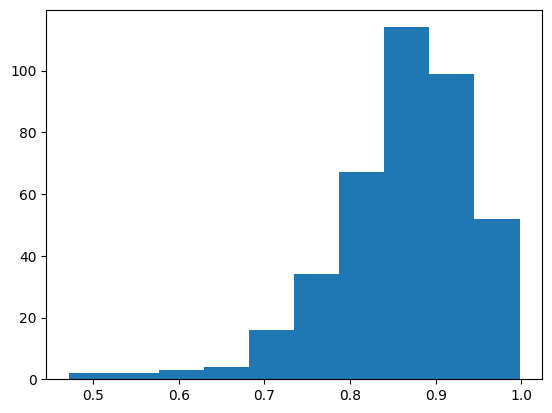

In [41]:
sub = resold[resold.extra_toks<100].scos
print(mean(sub))
plt.hist(sub)

(array([220.,  91.,  40.,  25., 170.,  16.,  26.,   5.,   4.,   3.]),
 array([ -1. ,  21.1,  43.2,  65.3,  87.4, 109.5, 131.6, 153.7, 175.8,
        197.9, 220. ]),
 <BarContainer object of 10 artists>)

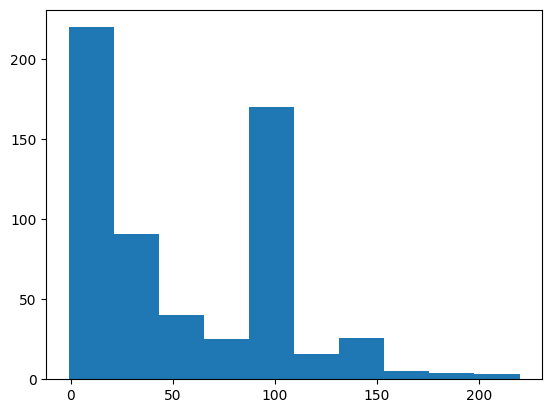

In [42]:
plt.hist(resold.extra_toks)

In [23]:
finesample_df

,scos,budgets,outs
0,0.654249,68,I think that is important to understand the si...
1,0.857752,41,The pressure is not the only issue. The heat g...
2,0.876001,126,The best we can tell is that ISON will lose ab...
3,0.879815,49,Blisters are a sign that your skin has broken ...
4,0.909598,306,"Many people are good at explaining things, but..."
5,0.556138,130,An uninstaller is a program that helps with th...
6,0.909758,67,I was just trying to figure out who in their r...
7,0.859151,161,"To find and index websites, a search engine us..."
8,0.572144,269,The only explanation I can come up with is tha...
9,0.792256,39,Another article on the subject; _URL_1_. The '...


In [9]:
a = [1, 2]

In [20]:
finesample_df['budgets'].mean()

137.4

In [3]:
a1 = pd.read_json("output/pfsample/finesamp.jsonl", orient="records", lines=True)


In [5]:
a1.budgets.mean()

115.71

In [ ]:
adaptbase_df = test_baseline(inplist, pfsampler, .85, 4)
pfsample_df = test_pfsample(inplist, pfsampler, 18, [10, 20])

adaptbase_df.to_json("output/pfsample/abase.jsonl", lines=True, orient='records')
pfsample_df.to_json("output/pfsample/pfsample.jsonl", lines=True, orient='records')

monkeysamp
monkeysamp
monkeysamp
monkeysamp
monkeysamp
monkeysamp
monkeysamp
monkeysamp
monkeysamp
monkeysamp
monkeysamp
monkeysamp
monkeysamp
monkeysamp
monkeysamp
monkeysamp
monkeysamp
monkeysamp
monkeysamp
monkeysamp
monkeysamp
monkeysamp
monkeysamp
monkeysamp
monkeysamp
monkeysamp
monkeysamp
monkeysamp
monkeysamp
monkeysamp
monkeysamp
monkeysamp
monkeysamp
monkeysamp
monkeysamp
monkeysamp
monkeysamp
monkeysamp
monkeysamp
monkeysamp
monkeysamp
monkeysamp
monkeysamp
monkeysamp
monkeysamp
monkeysamp
monkeysamp


In [8]:
print(adaptbase_df['budgets'].mean())
print(adaptbase_df['scos'].mean())

130.4
0.809410572052002


In [12]:
print(pfsample_df['budgets'].mean())
print(pfsample_df['scos'].mean())

253.6
0.8504377722740173


In [26]:
adaptbase_df = test_baseline(inplist, pfsampler, .85, 2)

monkeysamp
monkeysamp
monkeysamp
monkeysamp
monkeysamp
monkeysamp
monkeysamp
monkeysamp
monkeysamp
monkeysamp
monkeysamp
monkeysamp
monkeysamp
monkeysamp
monkeysamp
monkeysamp
monkeysamp
monkeysamp


In [27]:
print(adaptbase_df['budgets'].mean())
print(adaptbase_df['scos'].mean())

129.2
0.8531928896903992
